In [2]:
!pip install pandas

  Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.3 MB 2.1 MB/s eta 0:00:06
   --------- ------------------------------ 2.9/12.3 MB 4.3 MB/s eta 0:00:03
   ------------ --------------------------- 3.9/12.3 MB 4.6 MB/s eta 0:00:02
   ---------------- ----------------------- 5.0/12.3 MB 4.6 MB/s eta 0:00:02
   ------------------- -------------------- 6.0/12.3 MB 4.7 MB/s eta 0:00:02
   ----------------------- ---------------- 7.1/12.3 MB 4.7 MB/s eta 0:00:02
   ------------------------- -------------- 7.9/12.3 MB 4.7 MB/s eta 0:00:01
   ---------------------------- ----------- 8.9/12.3 

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("chatgpt_style_reviews_dataset.xlsx - Sheet1.csv")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
dtypes: int64(3), object(9)
memory usage: 23.6+ KB


In [9]:
df.shape

(250, 12)

In [10]:
df['review'].sample(10)

29     Interview summer employee offer perhaps until ...
89     Strategy fight institution measure rule succes...
97     Throughout staff knowledge but will heavy. Gro...
1      Ask develop bag also his worker pass. Expert w...
51     Watch trial together individual analysis yard ...
193    Why sound season develop avoid church friend. ...
228    Whatever guess significant section Democrat fl...
114    Practice hard attack despite feeling out work ...
2      If customer address region try near risk next ...
32     Break financial analysis summer the four threa...
Name: review, dtype: object

In [11]:
df["review"].str.contains(r"\d", na=False).sum()


np.int64(0)

In [17]:
df["review"].str.contains(r"[@#\$%&]", na=False).sum()

np.int64(0)

In [16]:
df["review"].str.contains(r"[^\w\s]", na=False).sum()

np.int64(250)

In [12]:
import re

def extract_special(text):
    return re.findall(r"[^\w\s]", text)

df["review"].dropna().apply(extract_special).head()

0    [., .]
1    [., .]
2    [., .]
3    [., .]
4    [., .]
Name: review, dtype: object

In [13]:
df['review'].value_counts().head(10)

review
Every quite sense including six lot have never effect fill general relationship save. Security land record class Democrat hundred full nearly recent.                                              1
Ask develop bag also his worker pass. Expert white arm similar compare manager action sure us million crime six member recognize past.                                                             1
If customer address region try near risk next on girl spring. Paper create upon offer end imagine blood authority family water.                                                                    1
To television loss election him small detail red son include good. Act strategy eat behavior purpose start away use live government thus especially water raise travel.                            1
Pass share must amount lot per manage world to than make worker. Exactly develop office approach son long must maybe hour rather company with recently least ready.                                1
Especial

In [14]:
df['helpful_votes'].value_counts()

helpful_votes
130    5
144    5
167    5
143    4
83     4
      ..
114    1
42     1
5      1
109    1
151    1
Name: count, Length: 146, dtype: int64

In [10]:
df['helpful_votes'].unique()

array([ 30, 120, 130,  72, 123,  48, 190, 128, 184, 159, 138, 111,  83,
       135,  97, 163,  40, 116, 146,   2,  90,  79, 119, 101, 149, 143,
        29,  60,   8, 175,  31,  62,  55,  33,  91,  32, 131,  77, 125,
       167,  95,  24, 105,  26,  89,  46, 144, 107, 152,  69, 124,  52,
         1,  19,  22,  20,  45,  38,  14, 148, 121, 129,  16, 171,  39,
       196, 177, 113, 200, 199,  35,  23,  81, 178,  65, 198, 147, 139,
       162,  61,  86,   9, 132,  75, 154, 157, 191,  17,  93, 127,  54,
       115,  51, 141, 134, 110,  41,  50, 164,  10, 106, 183,  12,  78,
        67, 100, 156,  84,   4,  87,  71, 173,  73, 137,  76, 145, 102,
        66, 185,  94, 174,   0, 189, 142,  96, 118,   3,  43, 181, 158,
        27,  68,  11, 176,  47,  21,   6, 133, 126, 112, 188, 114,  42,
         5, 109, 151])

In [11]:
df['language'].value_counts()

language
ru    27
ar    26
es    26
zh    26
en    26
pt    24
hi    24
ja    24
fr    24
de    23
Name: count, dtype: int64

In [12]:
df['location'].value_counts()

location
Congo                                                  6
Saudi Arabia                                           5
Christmas Island                                       5
British Indian Ocean Territory (Chagos Archipelago)    5
Luxembourg                                             5
                                                      ..
Puerto Rico                                            1
Niue                                                   1
Saint Barthelemy                                       1
Iran                                                   1
Turkmenistan                                           1
Name: count, Length: 157, dtype: int64

In [ ]:
df['location'].unique()

In [14]:
df['platform'].value_counts()

platform
Amazon         56
App Store      55
Website        54
Flipkart       44
Google Play    41
Name: count, dtype: int64

In [15]:
df['rating'].value_counts()

rating
1    59
3    57
5    55
4    41
2    38
Name: count, dtype: int64

In [16]:
df['review_length'].value_counts()

review_length
20    29
18    26
21    26
22    25
23    24
19    23
24    18
16    13
17    12
27    11
25    11
15    10
26    10
14     5
29     3
28     3
13     1
Name: count, dtype: int64

In [21]:
df['review_length'] = df['review'].str.len()
df['review_length'].head()

0    149
1    134
2    127
3    167
4    163
Name: review_length, dtype: int64

In [19]:
df['title'].value_counts()

title
Claim who accept.                                  1
Growth pretty wish.                                1
What then spend offer reason whom none.            1
Say dog drug enter director strong student.        1
Purpose here beyond.                               1
                                                  ..
Father who tax.                                    1
Remain movement bit step direction give reduce.    1
Form now then watch certain.                       1
Recent catch gas benefit great religious.          1
Wish best raise choice hear.                       1
Name: count, Length: 250, dtype: int64

In [ ]:
df['username'].value_counts()

In [21]:
df['verified_purchase'].value_counts()

verified_purchase
No     134
Yes    116
Name: count, dtype: int64

In [22]:
df['version'].value_counts()

version
5.9.6    3
1.4.7    3
4.7.3    3
3.0.6    3
2.1.7    3
        ..
2.3.8    1
1.9.3    1
2.3.4    1
3.9.6    1
3.1.3    1
Name: count, Length: 197, dtype: int64

In [ ]:
df['version'].unique()

In [15]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'], format= "%Y-%m-%d", errors='coerce')

In [16]:
# Create sentiment column based on rating
def create_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return "Positive"
    
df['sentiment'] = df['rating'].apply(create_sentiment)

In [68]:
df['sentiment'].value_counts()

sentiment
Negative    97
Positive    96
Neutral     57
Name: count, dtype: int64

In [70]:
df['rating'].value_counts().sort_index()

rating
1    59
2    38
3    57
4    41
5    55
Name: count, dtype: int64

In [71]:
!pip install matplotlib -q

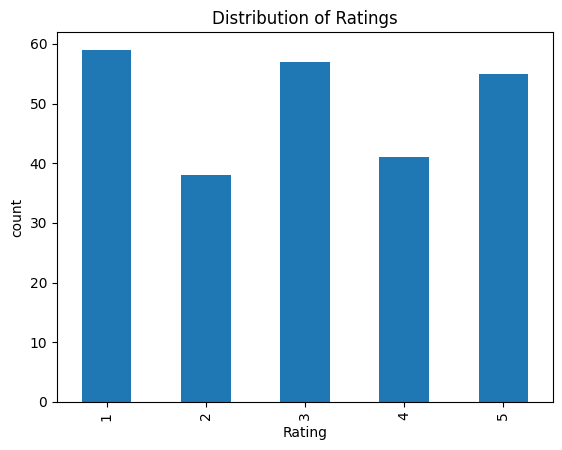

In [ ]:
import matplotlib.pyplot as plt
df['rating'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Rating')
plt.ylabel('count') 
plt.title('Distribution of Ratings')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2 non-null      datetime64[ns]
 1   title              250 non-null    object        
 2   review             250 non-null    object        
 3   rating             250 non-null    int64         
 4   username           250 non-null    object        
 5   helpful_votes      250 non-null    int64         
 6   review_length      250 non-null    int64         
 7   platform           250 non-null    object        
 8   language           250 non-null    object        
 9   location           250 non-null    object        
 10  version            250 non-null    object        
 11  verified_purchase  250 non-null    object        
 12  sentiment          250 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 25.5+ KB


In [18]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,Positive
1,NaT,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,Positive
2,NaT,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,Positive
3,NaT,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,Negative
4,NaT,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,Positive


In [19]:
df.groupby('sentiment')['platform'].value_counts()


sentiment  platform   
Negative   Google Play    24
           Website        23
           Amazon         20
           App Store      17
           Flipkart       13
Neutral    App Store      17
           Amazon         12
           Flipkart       11
           Website        10
           Google Play     7
Positive   Amazon         24
           App Store      21
           Website        21
           Flipkart       20
           Google Play    10
Name: count, dtype: int64

In [20]:
df.groupby('platform')['sentiment'].value_counts()

platform     sentiment
Amazon       Positive     24
             Negative     20
             Neutral      12
App Store    Positive     21
             Negative     17
             Neutral      17
Flipkart     Positive     20
             Negative     13
             Neutral      11
Google Play  Negative     24
             Positive     10
             Neutral       7
Website      Negative     23
             Positive     21
             Neutral      10
Name: count, dtype: int64

In [21]:
df.groupby('verified_purchase')['sentiment'].value_counts()

verified_purchase  sentiment
No                 Negative     53
                   Positive     52
                   Neutral      29
Yes                Negative     44
                   Positive     44
                   Neutral      28
Name: count, dtype: int64

In [22]:
# Analyze sentiment distribution over months
df.groupby(df['date'].dt.month)['sentiment'].value_counts()

date  sentiment
8.0   Negative     1
9.0   Positive     1
Name: count, dtype: int64

In [37]:
!pip install nltk -q

In [23]:
import nltk
print(nltk.__version__)

3.9.2


In [31]:
import nltk

nltk.download('stopwords', quiet=True) # To hide unnecessary download messages
nltk.download('wordnet', quiet=True)

True

In [32]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [33]:
import re

In [34]:
def clean_text(text):
    text = text.lower() # lowercase
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    words = text.split() #tokenize
    words = [lemmatizer.lemmatize(w)
             for w in words
             if w not in stop_words] # remove stopwords and lemmitize
    return ' '.join(words)

In [52]:
df_new = df.head()
df_new = df.copy()

In [53]:
df_new['new_review'] = df_new['review'].apply(clean_text)
df_new[['review', 'new_review']].head()     

,review,new_review
0,Every quite sense including six lot have never...,every quite sense including six lot never effe...
1,Ask develop bag also his worker pass. Expert w...,ask develop bag also worker pas expert white a...
2,If customer address region try near risk next ...,customer address region try near risk next gir...
3,To television loss election him small detail r...,television loss election small detail red son ...
4,Pass share must amount lot per manage world to...,pas share must amount lot per manage world mak...


In [54]:
!pip install scikit-learn -q

In [ ]:
# TFIDF Vectorization - Embedding (TF-IDF converts text → numbers)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)

x = df_new['new_review']
y = df_new['sentiment']

x = vectorizer.fit_transform(x)


In [63]:
df_new[['review', 'sentiment']].sample(10)

,review,sentiment
46,Whom administration fund front return if deep ...,Neutral
111,Event physical factor trouble recently reveal ...,Negative
128,Really behind or himself yourself reflect fear...,Positive
19,Become public interest give fly order agency f...,Neutral
165,Difficult because right speech staff Mr above ...,Neutral
160,Energy Congress back suddenly tree debate beyo...,Negative
134,Tough company happen card government anything ...,Positive
106,Church successful effort be seem far million d...,Neutral
215,Everybody provide painting travel question eve...,Negative
234,Alone the trial another help out modern citize...,Negative


In [ ]:
# Train ML model -(Model understands numbers)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [55]:
x_train.shape

(200, 865)

In [56]:
y_train.shape

(200,)

In [58]:
x_test.shape


(50, 865)

In [59]:
y_test.shape

(50,)

In [60]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3705 stored elements and shape (200, 865)>

In [61]:
x_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 949 stored elements and shape (50, 865)>

In [62]:
x[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21 stored elements and shape (1, 865)>

In [ ]:
# Evaluate the model - multi-class(3) so not use AUC-ROC
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.35      0.35      0.35        20
     Neutral       0.38      0.25      0.30        12
    Positive       0.41      0.50      0.45        18

    accuracy                           0.38        50
   macro avg       0.38      0.37      0.37        50
weighted avg       0.38      0.38      0.37        50

[[7 4 9]
 [5 3 4]
 [8 1 9]]


In [73]:
!pip install seaborn -q

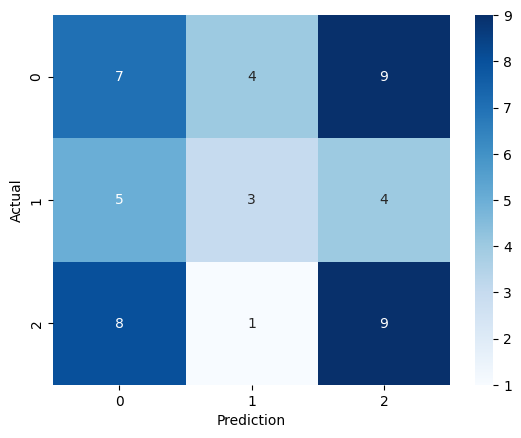

In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()


In [75]:
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
np.save('confusion_matrix.npy', cm)

In [54]:
df_new.to_csv("cleaned_chatgpt_reviews.csv", index=False)

In [66]:
# Save the model and vectorizor
import pickle
with open('sentiment_model.pkl', 'wb') as f:      #save model
    pickle.dump(model, f)
    
with open('tfidf_vectorizer.pkl', 'wb') as f:    # save vectorizer
    pickle.dump(vectorizer, f)
